# Part 1

In [523]:
#Essential Libraries
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns # visualization
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

plt.style.use('fivethirtyeight')
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")

## Data Loading

In [524]:
#Data Origin
dataset = "https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv"
dataset_columns = "https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt"


### Reading the data using pandas

In [525]:
cancer_df = pd.read_csv(dataset, index_col=0,header=None).reset_index()
cancer_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Reading the columns of the dataframe

In [526]:
cancer_df_columns = pd.read_csv(dataset_columns, header=None)
cancer_df_columns

,0
0,ID
1,diagnosis
2,radius_mean
3,radius_sd_error
4,radius_worst
5,texture_mean
6,texture_sd_error
7,texture_worst
8,perimeter_mean
9,perimeter_sd_error


##### Assigning the columns

In [527]:
cancer_df.columns = list(cancer_df_columns[0])

In [528]:
cancer_df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### I am saving the data frame in to my local machine to access in future without hitting the online gist link to download the data

In [529]:
cancer_df.to_csv("Breast_Cancer_Data.csv", index = False)

###### Before continuing any further process let us check the data statistics

In [530]:
cancer_df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


##### The column ID seems to be high cardinal so it is required to remove from the dataframe for further analysis. As it is not significant for a peron having cancer or not.

In [531]:
cancer_df.drop(columns = 'ID', inplace= True)

## Exploratory Data Analysis

Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

Next step is to explore the data. There are two approached used to examine the data using:

##### Descriptive statistics 
is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.

##### Visualization 
is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

### Descriptive statistics

In [532]:
plt.rcParams['figure.figsize'] = (15,8) 
plt.rcParams['axes.titlesize'] = 'large'

In [533]:
#basic descriptive statistics
cancer_df.describe()


,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [534]:
cancer_df.skew()

radius_mean                   0.942380
radius_sd_error               0.650450
radius_worst                  0.990650
texture_mean                  1.645732
texture_sd_error              0.456324
texture_worst                 1.190123
perimeter_mean                1.401180
perimeter_sd_error            1.171180
perimeter_worst               0.725609
area_mean                     1.304489
area_sd_error                 3.088612
area_worst                    1.646444
smoothness_mean               3.443615
smoothness_sd_error           5.447186
smoothness_worst              2.314450
compactness_mean              1.902221
compactness_sd_error          5.110463
compactness_worst             1.444678
concavity_mean                2.195133
concavity_sd_error            3.923969
concavity_worst               1.103115
concave_points_mean           0.498321
concave_points_sd_error       1.128164
concave_points_worst          1.859373
symmetry_mean                 0.415426
symmetry_sd_error        

In [535]:
cancer_df.diagnosis.unique()


array(['M', 'B'], dtype=object)

In [536]:
# Group by diagnosis and review the output.
diag_gr = cancer_df.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])


,# of observations
diagnosis,
B,357
M,212


In [537]:
cancer_df.groupby('diagnosis').mean().T

diagnosis,B,M
radius_mean,12.146524,17.462830
radius_sd_error,17.914762,21.604906
radius_worst,78.075406,115.365377
texture_mean,462.790196,978.376415
texture_sd_error,0.092478,0.102898
texture_worst,0.080085,0.145188
perimeter_mean,0.046058,0.160775
perimeter_sd_error,0.025717,0.087990
perimeter_worst,0.174186,0.192909
area_mean,0.062867,0.062680


Check binary encoding from NB1 to confirm the coversion of the diagnosis categorical data into numeric, where

Malignant = 1 (indicates prescence of cancer cells)
Benign = 0 (indicates abscence)
Observation
357 observations indicating the absence of cancer cells and 212 show absence of cancer cell

Lets confirm this, by ploting the histogram

## Unimodal Data Visualizations

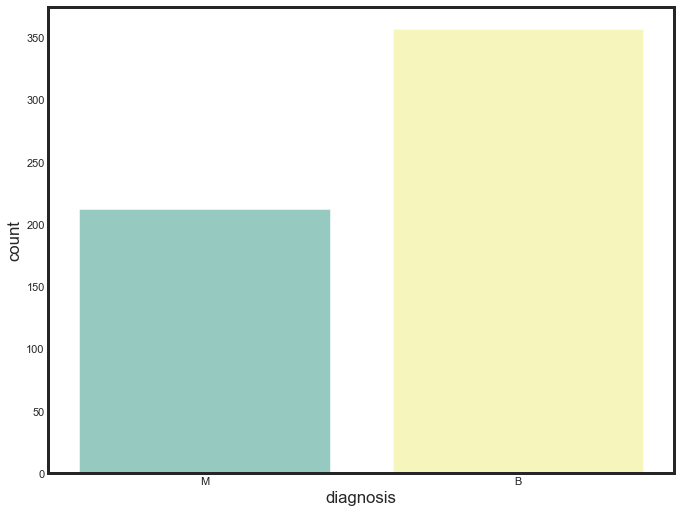

In [538]:
#lets get the frequency of cancer diagnosis
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})
sns.countplot(cancer_df['diagnosis'],label='Count',palette="Set3")

## Visualise distribution of data via histograms

Histograms are commonly used to visualize numerical variables. A histogram is similar to a bar graph after the values of the variable are grouped (binned) into a finite number of intervals (bins).

Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed or even has an exponential distribution. It can also help you see possible outliers.

Separate columns into smaller dataframes to perform visualization

In [539]:
data_mean_columns = [col for col in cancer_df.columns if "_mean" in col]

In [540]:
data_sd_columns = [col for col in cancer_df.columns if "_sd" in col]

In [541]:
data_worst_columns = [col for col in cancer_df.columns if "_worst" in col]

In [542]:
len(data_mean_columns) + len(data_sd_columns) + len(data_worst_columns) + (len(cancer_df[["diagnosis"]].columns))

31

In [543]:
len(cancer_df.columns)

31

In [544]:

#Break up columns into groups, according to their suffix designation 
#(_mean, _se,
# and __worst) to perform visualisation plots off. 
#Join the 'ID' and 'Diagnosis' back on
data_id_diag=cancer_df.loc[:,["diagnosis"]]
data_diag=cancer_df.loc[:,["diagnosis"]]

#For a merge + slice:
data_mean=cancer_df[data_mean_columns]
data_se=cancer_df[data_sd_columns]
data_worst=cancer_df[data_worst_columns]

print(data_diag.columns)
print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)

Index(['diagnosis'], dtype='object')
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_sd_error', 'texture_sd_error', 'perimeter_sd_error',
       'area_sd_error', 'smoothness_sd_error', 'compactness_sd_error',
       'concavity_sd_error', 'concave_points_sd_error', 'symmetry_sd_error',
       'fractal_dimension_sd_error'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


### Histogram the "_mean" suffix designition¶


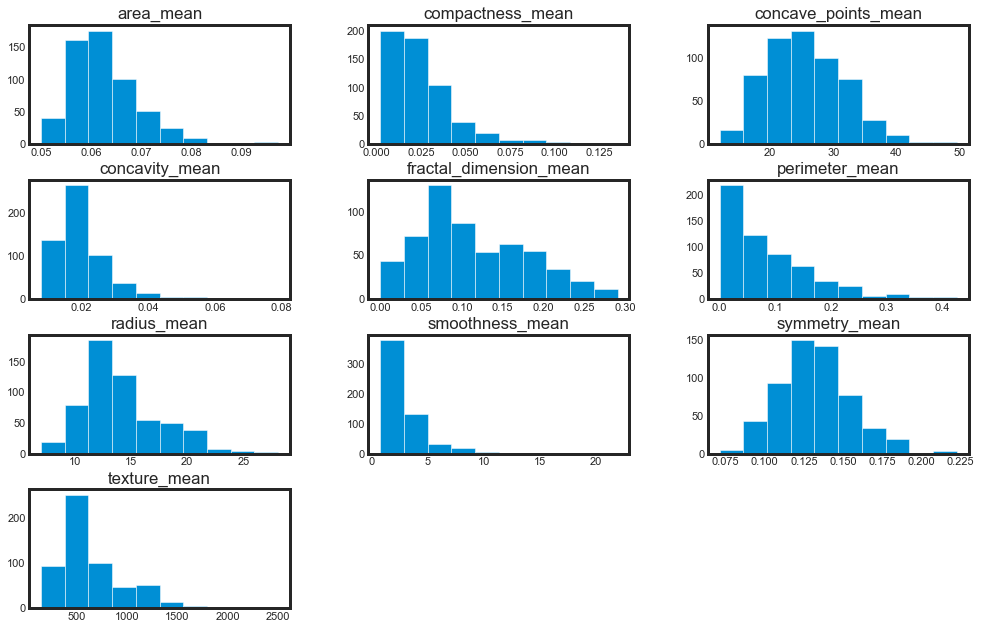

In [545]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)


### Histogram for the "_sd" suffix designition

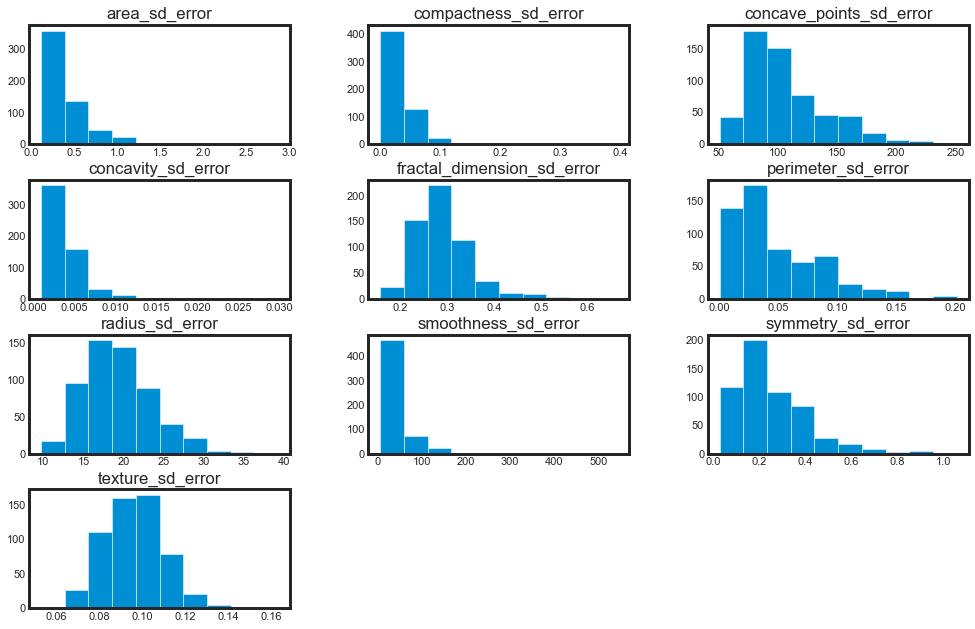

In [546]:
#Plot histograms of _se variables
hist_se=data_se.hist(bins=10, figsize=(15, 10),grid=False,)

### Histogram "_worst" suffix designition¶


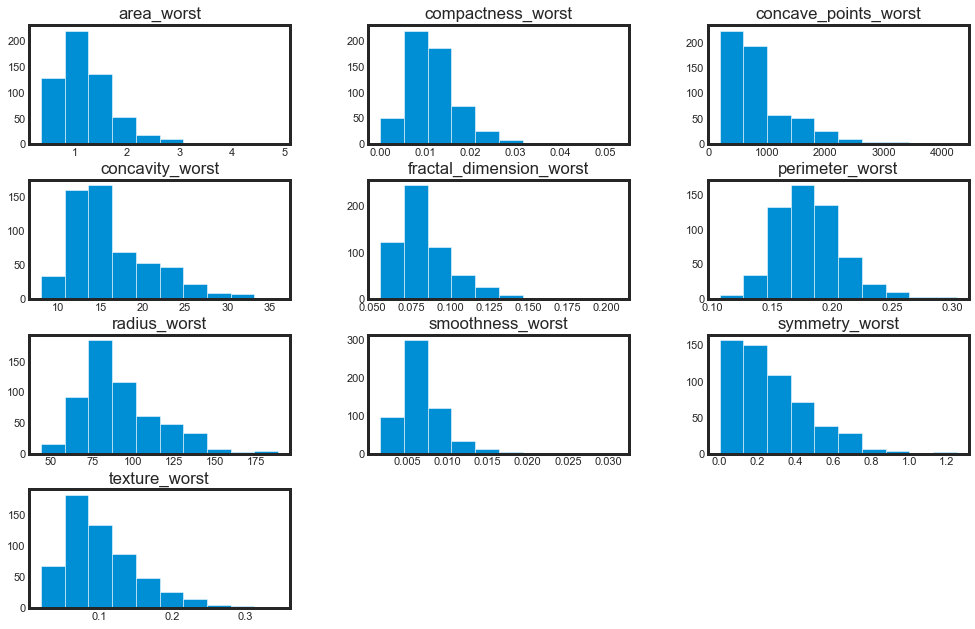

In [547]:
#Plot histograms of _worst variables
hist_worst=data_worst.hist(bins=10, figsize=(15, 10),grid=False,)

Observation

We can see that perhaps the attributes concavity,and concavity_point may have an exponential distribution ( ). We can also see that perhaps the texture and smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution. This is interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables.

## Visualize distribution of data via density plots

### Density plots "_mean" suffix designition

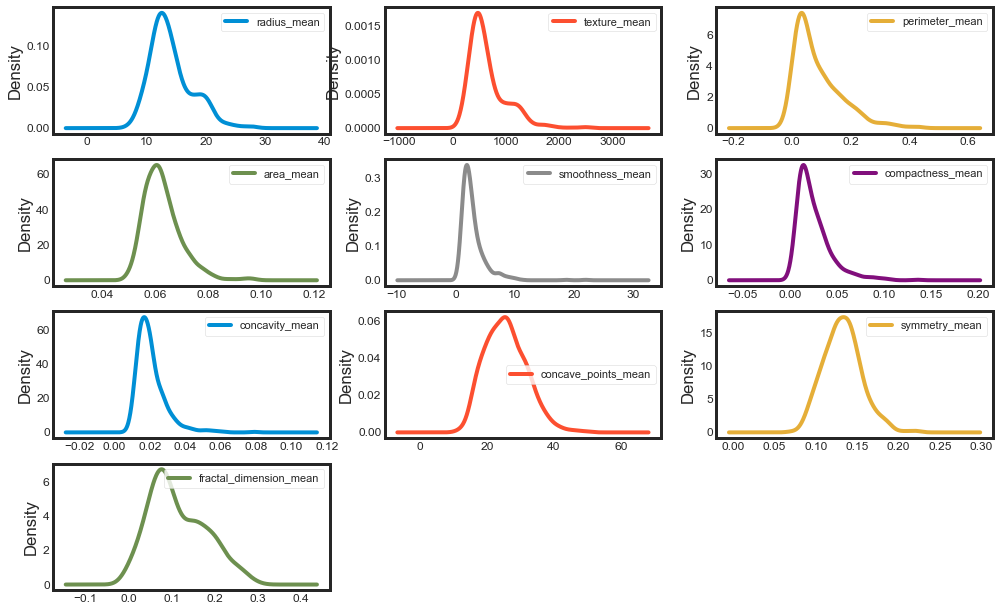

In [548]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))


### Density plots "_sd" suffix designition

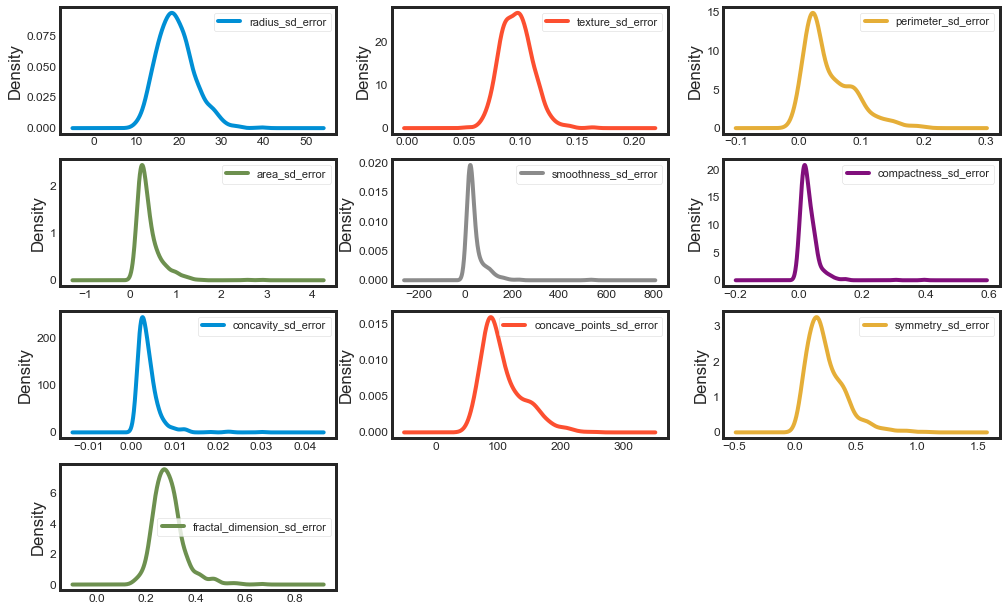

In [549]:
#Density Plots
plt = data_se.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))

### Density plot "_worst" suffix designition¶


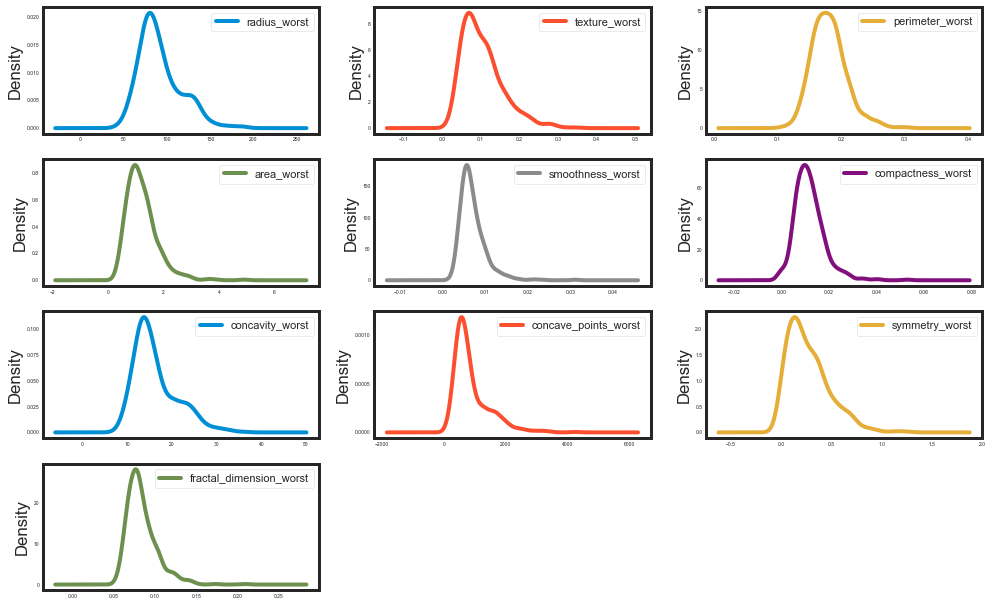

In [550]:
#Density Plots
plt = data_worst.plot(kind= 'kde', subplots=True, layout=(4,3), sharex=False, sharey=False,fontsize=5, 
                     figsize=(15,10))

## Visualise distribution of data via box plot

## Box plot "_mean" suffix designition¶


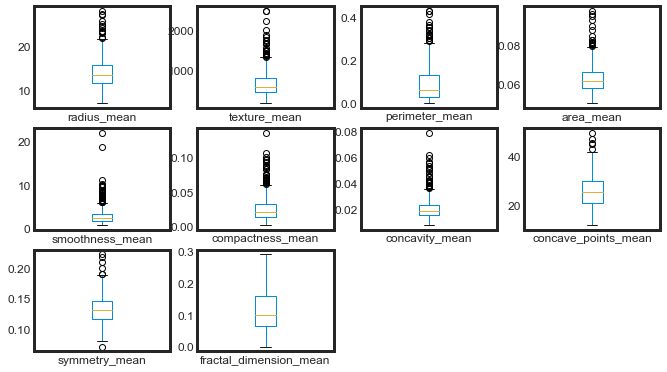

In [551]:
# box and whisker plots
plt=data_mean.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

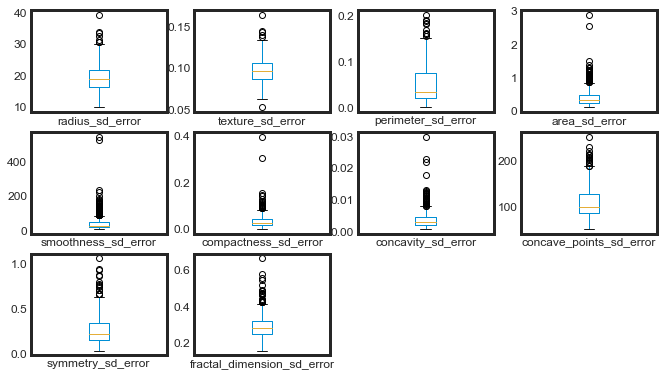

In [552]:
# box and whisker plots
plt=data_se.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

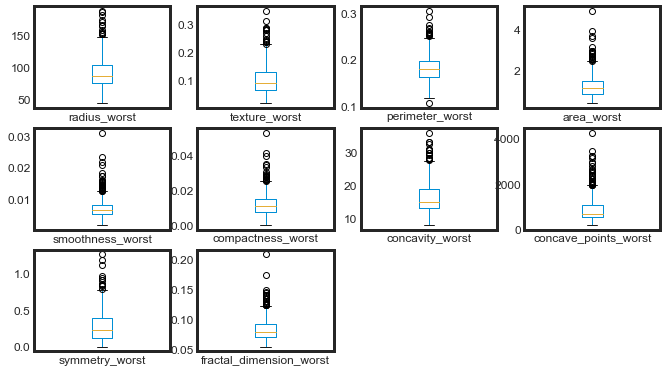

In [553]:
# box and whisker plots
plt=data_worst.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=12)

## Multimodal Data Visualizations

#### Scatter plots
#### Correlation matrix

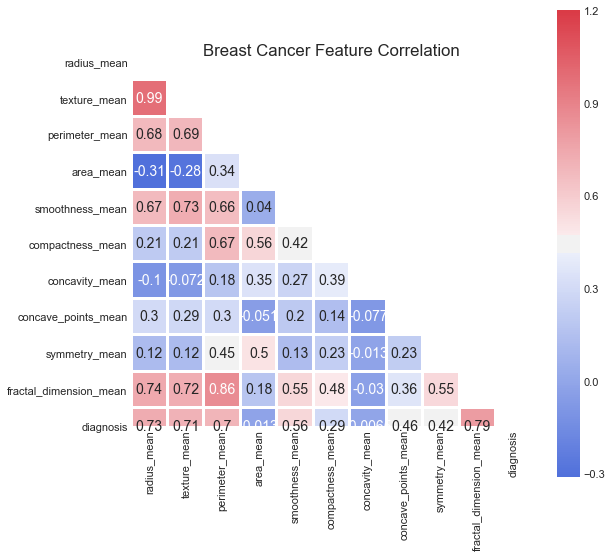

In [556]:
from matplotlib import pyplot as plt

# Compute the correlation matrix

corr = pd.concat([data_mean,(cancer_df['diagnosis']=='M').astype(int)],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

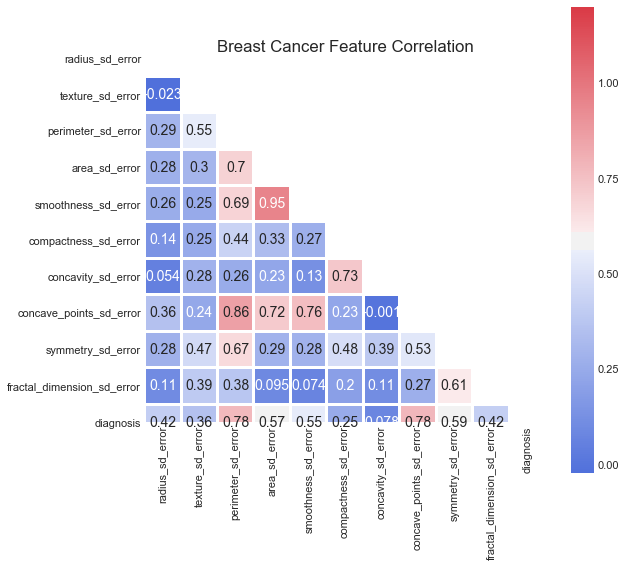

In [557]:
# Compute the correlation matrix

corr = pd.concat([data_se,(cancer_df['diagnosis']=='M').astype(int)],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

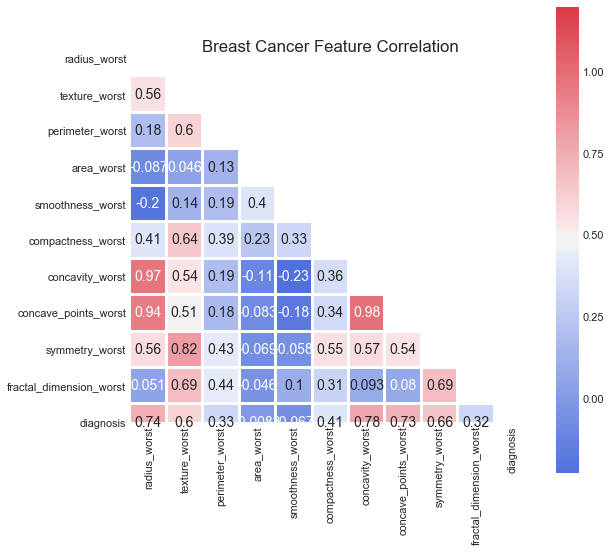

In [558]:
# Compute the correlation matrix

corr = pd.concat([data_worst,(cancer_df['diagnosis']=='M').astype(int)],axis=1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(8, 8))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap, mask=mask, 
            ax=ax,annot=True, fmt='.2g',linewidths=2)

In [559]:
col = data_mean_columns+["diagnosis"]
cancer_df[col].groupby("diagnosis").mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,12.146524,462.790196,0.046058,0.062867,2.000321,0.021438,0.020584,23.515070,0.124959,0.074444
M,17.462830,978.376415,0.160775,0.062680,4.323929,0.032281,0.020472,29.318208,0.144845,0.182237


In [560]:
col = data_sd_columns+["diagnosis"]
cancer_df[col].groupby("diagnosis").mean()

,radius_sd_error,texture_sd_error,perimeter_sd_error,area_sd_error,smoothness_sd_error,compactness_sd_error,concavity_sd_error,concave_points_sd_error,symmetry_sd_error,fractal_dimension_sd_error
diagnosis,,,,,,,,,,
B,17.914762,0.092478,0.025717,0.284082,21.135148,0.025997,0.003636,87.005938,0.182673,0.270246
M,21.604906,0.102898,0.087990,0.609083,72.672406,0.041824,0.004062,141.370330,0.374824,0.323468


In [561]:
col = data_worst_columns+["diagnosis"]
cancer_df[col].groupby("diagnosis").mean()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,
B,78.075406,0.080085,0.174186,1.220380,0.007196,0.009858,13.379801,558.899440,0.166238,0.079442
M,115.365377,0.145188,0.192909,1.210915,0.006780,0.015060,21.134811,1422.286321,0.450606,0.091530


### Summary

Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.

In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.


In [562]:
cancer_df.groupby("diagnosis")["smoothness_mean"].agg(["mean","median"]).T

diagnosis,B,M
mean,2.000321,4.323929
median,1.851000,3.679500


In [563]:
cancer_df.groupby("diagnosis")["compactness_mean"].agg(["mean","median"]).T

diagnosis,B,M
mean,0.021438,0.032281
median,0.016310,0.028590


In [564]:
cancer_df.columns

Index(['diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

## Exploratory Analysis:

Based on the correlation from the previous step

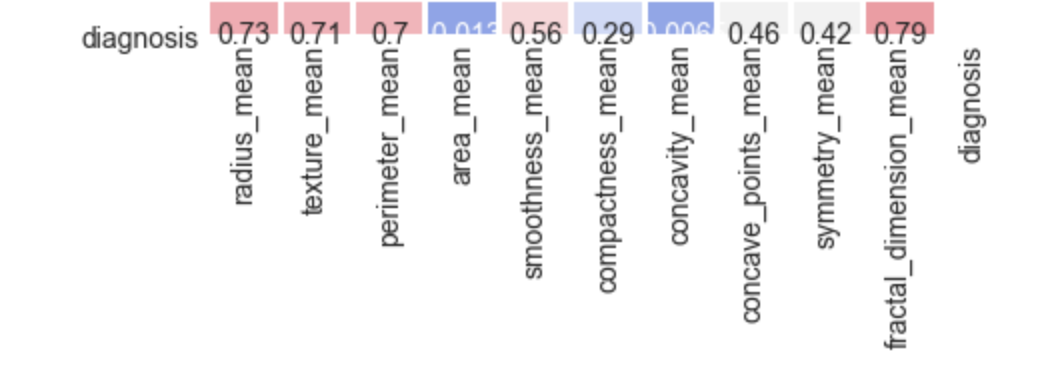

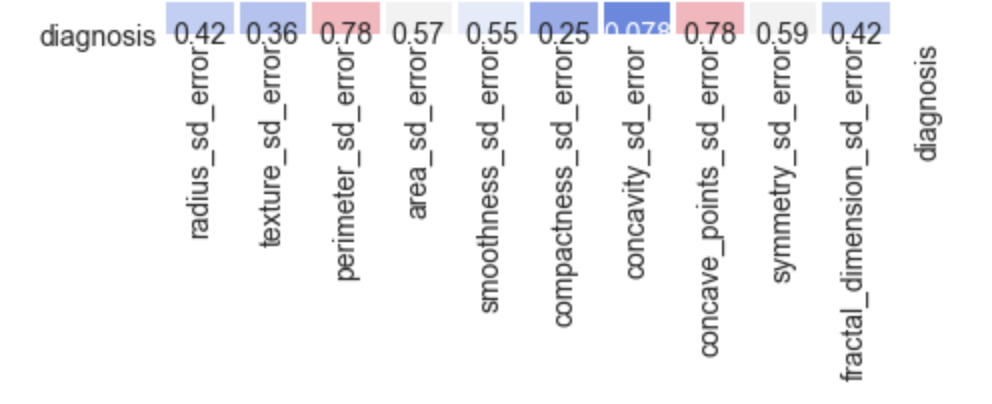

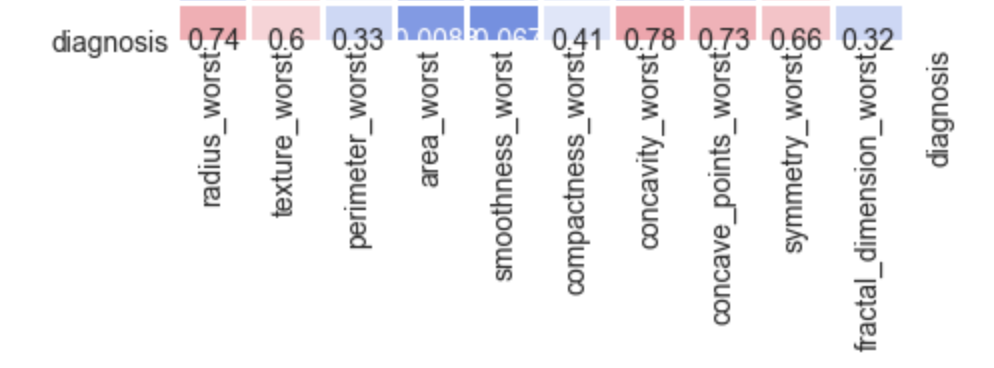

In [565]:
data_analysis = cancer_df[['fractal_dimension_mean','perimeter_sd_error','concave_points_sd_error','concavity_worst','diagnosis']]

In [566]:
data_analysis.corr()

,fractal_dimension_mean,perimeter_sd_error,concave_points_sd_error,concavity_worst
fractal_dimension_mean,1.000000,0.910155,0.816322,0.787424
perimeter_sd_error,0.910155,1.000000,0.855923,0.830318
concave_points_sd_error,0.816322,0.855923,1.000000,0.993708
concavity_worst,0.787424,0.830318,0.993708,1.000000


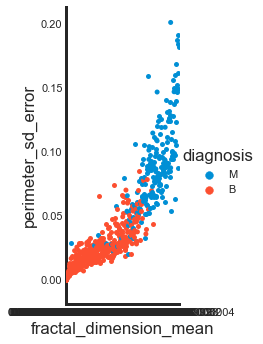

In [567]:
sns.catplot(x="fractal_dimension_mean", y="perimeter_sd_error", hue="diagnosis",
             aspect=.6,
            kind="swarm", data=data_analysis);

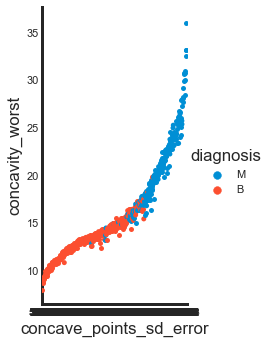

In [568]:
sns.catplot(x="concave_points_sd_error", y="concavity_worst", hue="diagnosis",
             aspect=.6,
            kind="swarm", data=data_analysis);


## Identify 2-3 variables that are predictive of a malignant tumor. Display the relationship visually and write 1-2 sentences explaining the relationship.

To achieve the above goal, I will use Principle Component Analysis (PCA)

In [569]:
X = cancer_df.drop(columns="diagnosis")

In [570]:
#Standardising the data
# Scale the data to be between -1 and 1
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [571]:
pca = PCA()
pca.fit_transform(X)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [572]:
covariance=pca.get_covariance()

In [573]:
explained_variance=pca.explained_variance_
explained_variance

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

In [574]:
sum(explained_variance)


30.05281690140843

In [575]:
pca.fit_transform(X)


array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

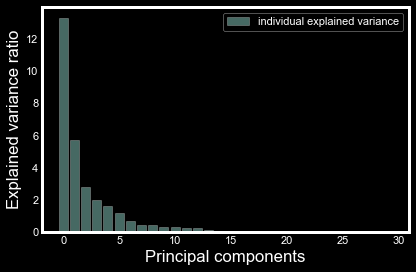

In [576]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(30), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

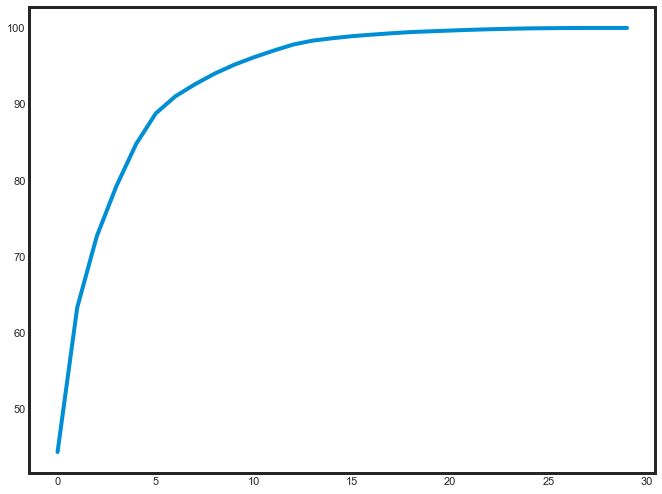

In [577]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

Deciding How Many Principal Components to Retain
In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a scree plot. More about scree plot can be found here, and hear

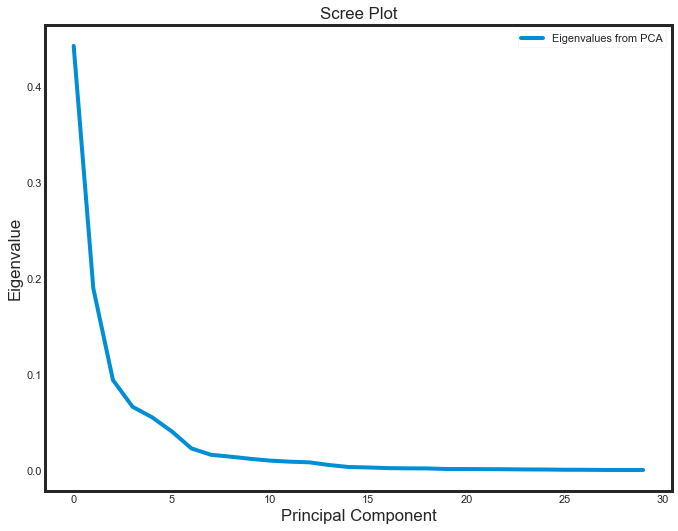

In [578]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)
plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
#leg.draggable(state=True)
plt.show()

In [579]:
sum(explained_variance[0:2])/sum(explained_variance)


0.632432076515594

We can see that the second half (15-30) of components has very few amount of variance of the data.The 1st 8 components retains more than 90% of the data. Especially, the first component explains almost 50% and the second explains 18%.



Let us take only first two principal components and visualise it using K-means clustering


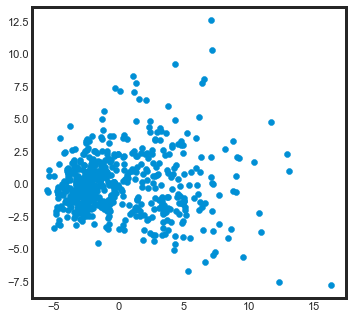

In [580]:
pca = PCA(n_components=2)
x = pca.fit_transform(X)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

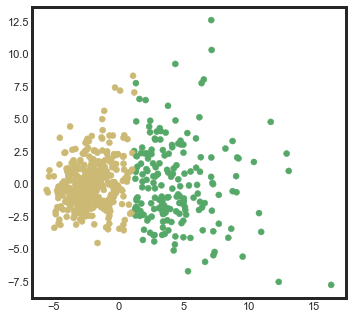

In [581]:
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(X)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

Thus using K-means we are able segregate 2 classes well using the first two components with maximum variance.

## Write a function to generate bootstrap samples of the data.

In [582]:
def bootstrap_data(data, train_size):
    #Get Bootstrap train data using resample function which taked the data 
    bootrap_train = resample(data, replace=True, n_samples=train_size, random_state=2,stratify=data)
    bootrap_train_test = pd.DataFrame([data.loc[x,:] for x in data.index if x not in bootrap_train.index])
    return bootrap_train, bootrap_train_test

In [583]:
train, test = bootstrap_data(cancer_df,train_size=500)

#### Principal Component Analysis

In [584]:
train.diagnosis.value_counts()

B    319
M    181
Name: diagnosis, dtype: int64

In [585]:
test.diagnosis.value_counts()

B    38
M    31
Name: diagnosis, dtype: int64

## Modeling

Build a model to predict the malignant tumors.

Use at least two classification techniques; compare and contrast the advantages and disadvantages of each. Identify how you would control for overfitting in each classification technique.

Evaluate the performance of each model. In each model, identify the most important predictive variables and explain how you identified them.



In [586]:
train['diagnosis'] = (train['diagnosis']=='M').astype(int)
test['diagnosis'] = (test['diagnosis']=='M').astype(int)

In [587]:
train_X = train.drop(columns = "diagnosis")
train_y = train["diagnosis"]
test_X = test.drop(columns = "diagnosis")
test_y = test["diagnosis"]

In [588]:
model = []
accuracy_train = []
accuracy_test = []

## Logistic Regression

In [589]:
model_LR= LogisticRegression()

In [590]:
model_LR.fit(train_X,train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [591]:
y_prob = model_LR.predict_proba(test_X)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


In [592]:
def Train_metrics(model, train_X = train_X , train_y = train_y):
    train_pred = model.predict(train_X)
    print("Train Confusion Matrix ")
    print(metrics.confusion_matrix(train_y,train_pred))
    print("Train Accuracy  ")
    print(metrics.accuracy_score(train_y,train_pred))
    return metrics.accuracy_score(train_y,train_pred)
    
def Test_metrics(model, test_X = test_X, test_y = test_y):
    test_pred = model.predict(test_X)
    print("Test Confusion Matrix ")
    print(metrics.confusion_matrix(test_y,test_pred))
    print("Test Accuracy  ")
    print(metrics.accuracy_score(test_y,test_pred))
    return metrics.accuracy_score(test_y,test_pred)
    

In [593]:
train_accuracy = Train_metrics(model_LR)

Train Confusion Matrix 
[[311   8]
 [ 13 168]]
Train Accuracy  
0.958


In [594]:
test_accuracy = Test_metrics(model_LR)

Test Confusion Matrix 
[[37  1]
 [ 3 28]]
Test Accuracy  
0.9420289855072463


In [595]:
model.append("Logistic Regression")
accuracy_train.append(train_accuracy)
accuracy_test.append(test_accuracy)

In [596]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9906621392190154

### We have a better model with no Overfitting

If there is a Overfitting we encounter we need to go for Regularization technique like Lasso, Ridge or ElasticNet can be used to mitigate 

Text(0.5, 0, 'False Positive Rate')

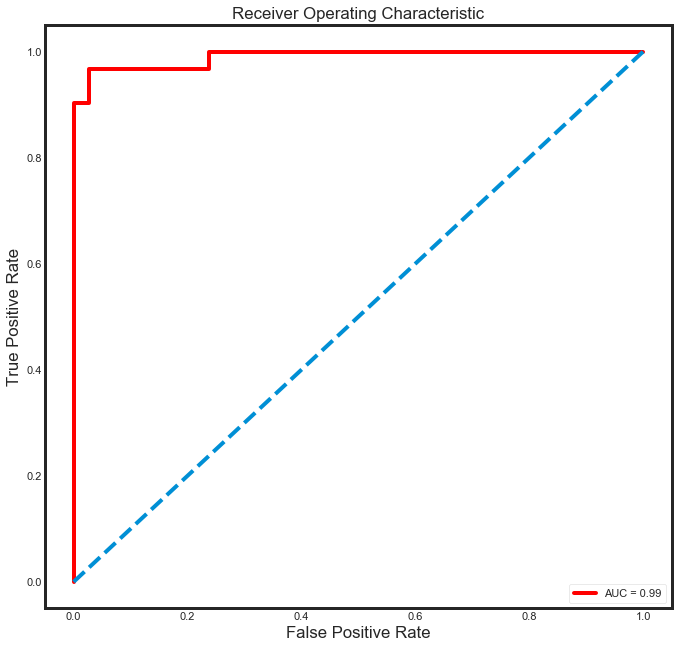

In [597]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [598]:
print(model_LR.coef_)


[[-2.05284040e+00 -1.49808479e-01  1.19435390e-01 -9.70325278e-04
   1.24758195e-01  3.62207206e-01  6.05745417e-01  3.08497758e-01
   1.95993406e-01  1.62607884e-02 -5.55110307e-02 -1.33721755e+00
  -5.27557285e-01  1.34632639e-01  1.63561448e-02  1.38820006e-02
   7.46455147e-02  3.83419552e-02  3.10724549e-02  2.25513753e-04
  -1.72870101e+00  3.71262124e-01  1.49940247e-01  2.62647888e-02
   2.50284841e-01  9.77614040e-01  1.53537437e+00  5.99783486e-01
   5.64536915e-01  8.97971401e-02]]


In [599]:
set(zip(model_LR.coef_[0],train.columns.drop("diagnosis")))

{(-2.052840397027305, 'radius_mean'),
 (-1.7287010114893664, 'concavity_worst'),
 (-1.337217548771067, 'area_worst'),
 (-0.5275572848138245, 'smoothness_mean'),
 (-0.14980847885524065, 'radius_sd_error'),
 (-0.055511030698717066, 'area_sd_error'),
 (-0.0009703252775875032, 'texture_mean'),
 (0.00022551375320764588, 'concavity_sd_error'),
 (0.013882000575900659, 'compactness_mean'),
 (0.016260788387541626, 'area_mean'),
 (0.016356144845789528, 'smoothness_worst'),
 (0.02626478879736091, 'concave_points_worst'),
 (0.031072454903083357, 'concavity_mean'),
 (0.03834195517347766, 'compactness_worst'),
 (0.07464551473271797, 'compactness_sd_error'),
 (0.08979714014608321, 'fractal_dimension_worst'),
 (0.11943539022216909, 'radius_worst'),
 (0.1247581952913669, 'texture_sd_error'),
 (0.13463263921253119, 'smoothness_sd_error'),
 (0.14994024747122087, 'concave_points_sd_error'),
 (0.19599340627958392, 'perimeter_worst'),
 (0.25028484081076374, 'symmetry_mean'),
 (0.3084977577797138, 'perimeter

In [600]:
res_log = pd.DataFrame(list(zip(model_LR.coef_[0],train.columns.drop("diagnosis"))),columns=["weights","column"])

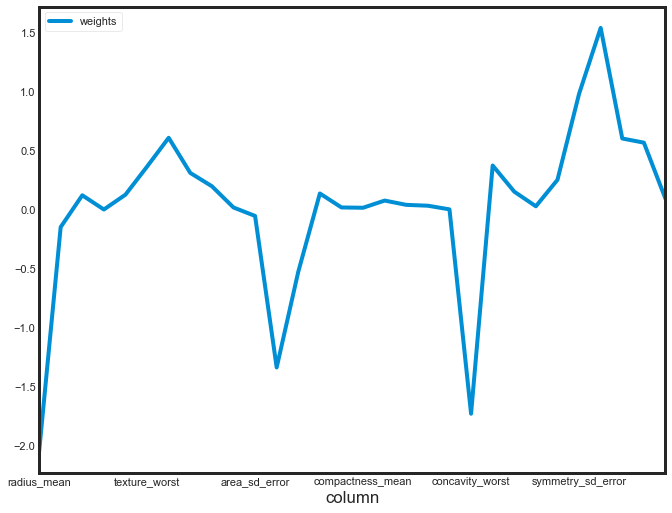

In [601]:
res_log.plot(x = "column", y = "weights")

Easy to see "radius_mean", "concavity_worst" play the most important role to indirectly proportional to the cancer

So, If the value of these column increases then there is a risk of Cancer

Easy to see "symmetry_worst", "symmetry_sd_error" play the most important role to directly proportional to the cancer

So, If the value of these column decreases then there is a risk of Cancer

## Decision Tree

In [602]:
model_DT= DecisionTreeClassifier()

In [603]:
model_DT.fit(train_X,train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [604]:
y_prob = model_DT.predict_proba(test_X)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


In [605]:
train_accuracy = Train_metrics(model_DT)

Train Confusion Matrix 
[[319   0]
 [  0 181]]
Train Accuracy  
1.0


In [606]:
test_accuracy = Test_metrics(model_DT)

Test Confusion Matrix 
[[37  1]
 [ 2 29]]
Test Accuracy  
0.9565217391304348


In [607]:
model.append("Decision Tree")
accuracy_train.append(train_accuracy)
accuracy_test.append(test_accuracy)

In [608]:
auc_roc=metrics.roc_auc_score(test_y,y_pred)
auc_roc

0.9545840407470289

In [609]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9545840407470289

Text(0.5, 0, 'False Positive Rate')

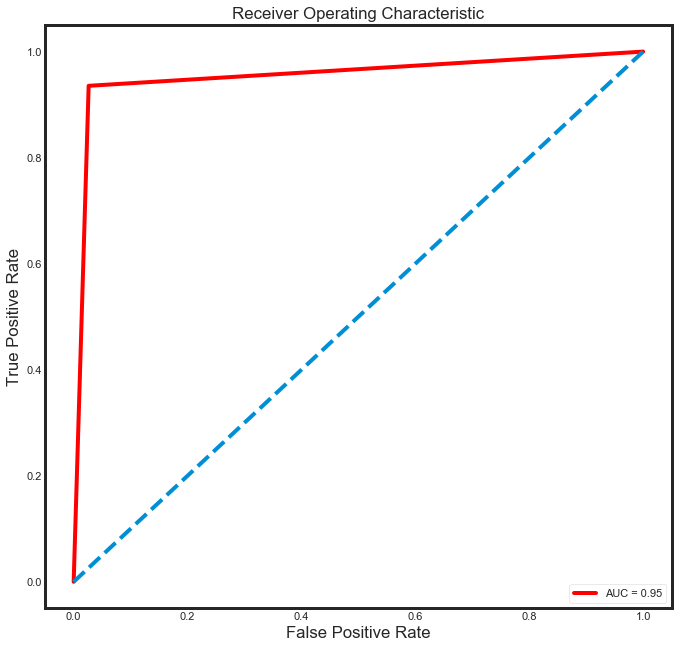

In [610]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

(0, 1)

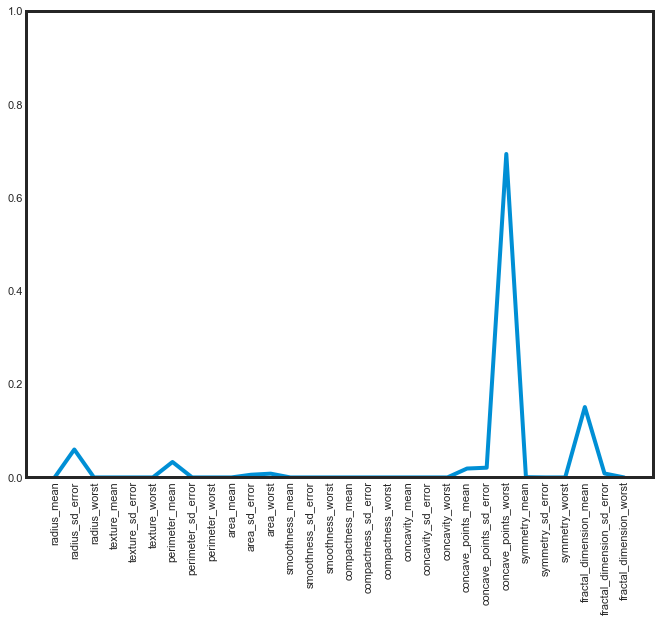

In [611]:
plt.plot(model_DT.feature_importances_, '-')
plt.xticks(range(30), train_X.columns , rotation=90)
plt.ylim(0, 1)

## Random Forest

In [612]:
model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [613]:
RR_model= RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

In [614]:
RR_model.fit(train_X,train_y)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [615]:
print(RR_model.best_score_)


0.95


In [616]:
print(RR_model.best_params_)


{'n_estimators': 80, 'min_samples_leaf': 10, 'max_features': 'sqrt'}


In [617]:
y_prob = RR_model.predict_proba(test_X)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.


In [618]:
train_accuracy = Train_metrics(RR_model)

Train Confusion Matrix 
[[314   5]
 [  7 174]]
Train Accuracy  
0.976


In [619]:
test_accuracy = Test_metrics(RR_model)

Test Confusion Matrix 
[[36  2]
 [ 1 30]]
Test Accuracy  
0.9565217391304348


In [620]:
model.append("Random forest")
accuracy_train.append(train_accuracy)
accuracy_test.append(test_accuracy)

In [621]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9915110356536503

Text(0.5, 0, 'False Positive Rate')

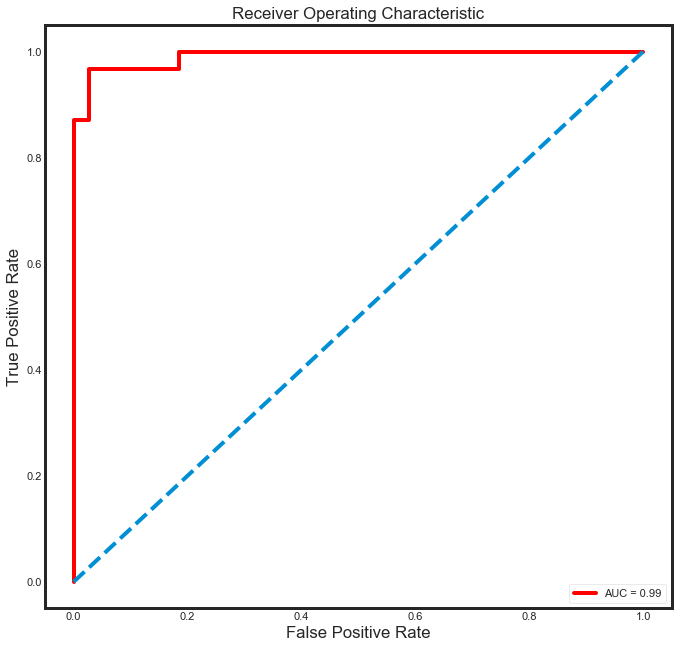

In [622]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [623]:
#Feature importance

# extract the numerical values of feature importance from the grid search
importances = RR_model.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(train_X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

    importance                     feature
0     0.141688     concave_points_sd_error
1     0.130313      fractal_dimension_mean
2     0.123876             concavity_worst
3     0.115352          perimeter_sd_error
4     0.074150                 radius_mean
5     0.064926        concave_points_worst
6     0.060758              perimeter_mean
7     0.059122                radius_worst
8     0.048255                texture_mean
9     0.047745              symmetry_worst
10    0.031167         smoothness_sd_error
11    0.018714             smoothness_mean
12    0.017543         concave_points_mean
13    0.010857               texture_worst
14    0.010141           symmetry_sd_error
15    0.008028               symmetry_mean
16    0.007397               area_sd_error
17    0.007370             radius_sd_error
18    0.007232  fractal_dimension_sd_error
19    0.003191     fractal_dimension_worst
20    0.002499        compactness_sd_error
21    0.002088            texture_sd_error
22    0.001

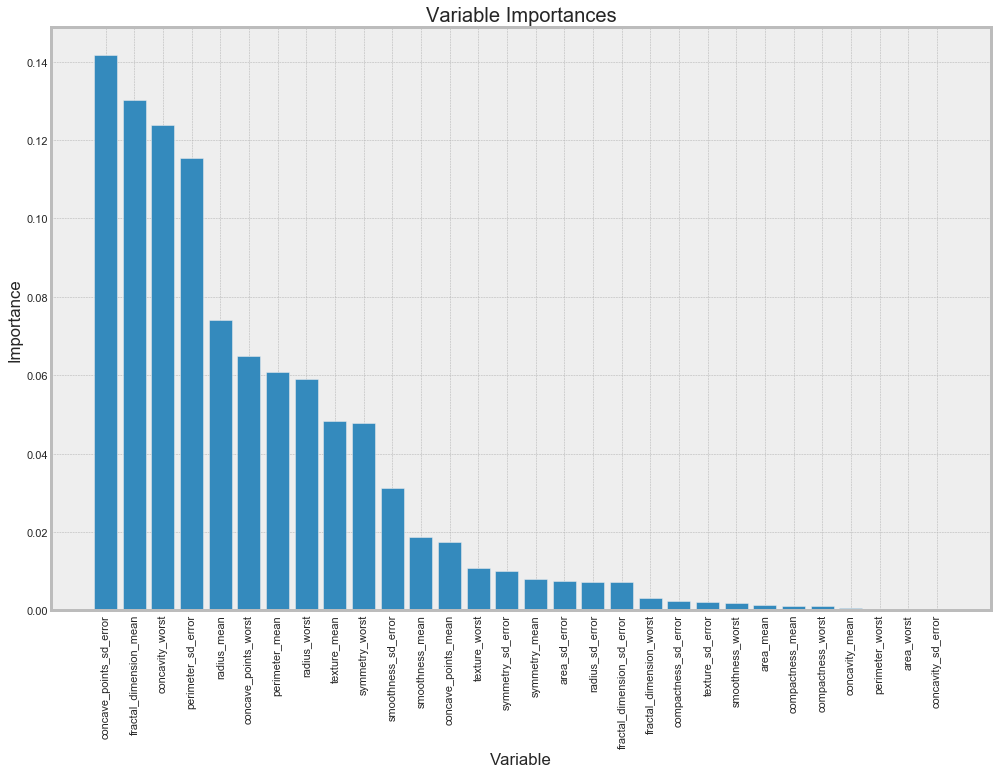

In [624]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Explanation

To Technical Audiences: Explain the limitations of your analysis and identify possible further steps you could take.

To Non-Technical Audiences: Write a short summary of your analysis, explaining how your model works and how it performs. Briefly explain the factors that contributed to malignant vs benign tumor identification.

### To Technical Audiences:

In [625]:
acc = accuracy_train+accuracy_test
sample = ["Train","Train","Train","Test","Test","Test"]
Res = pd.DataFrame([model+model,acc,sample])
Res = Res.T
Res.columns = ["Model", "Accuracy", "Sample"]

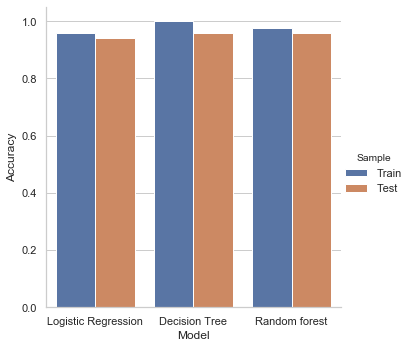

In [626]:
sns.set(style="whitegrid")
sns.factorplot(x='Model', y='Accuracy', hue = "Sample", data=Res, kind='bar')

### To Non Technical Audiences:

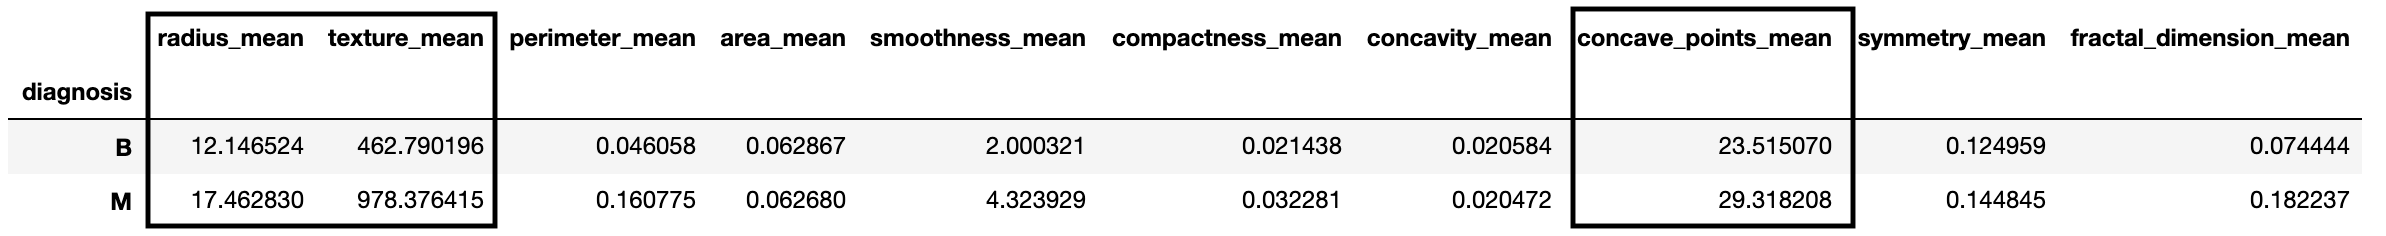

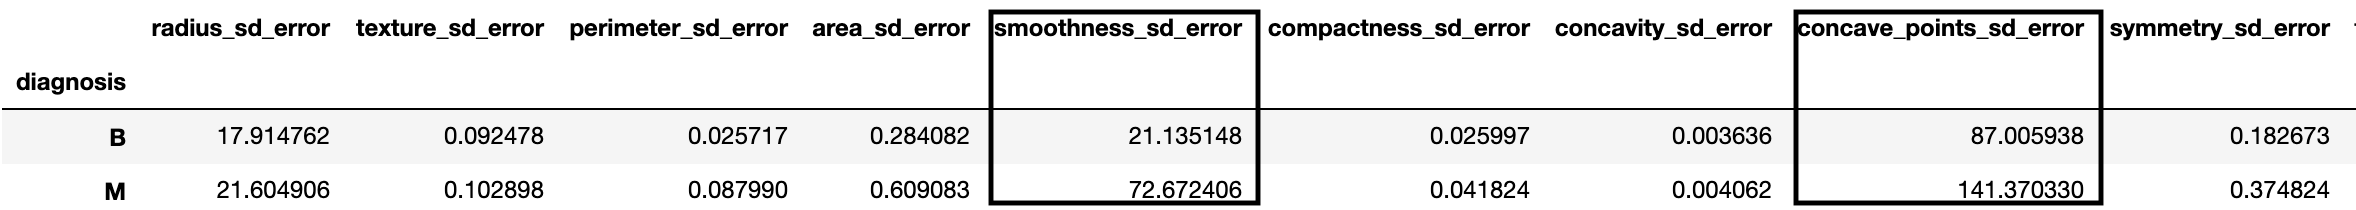

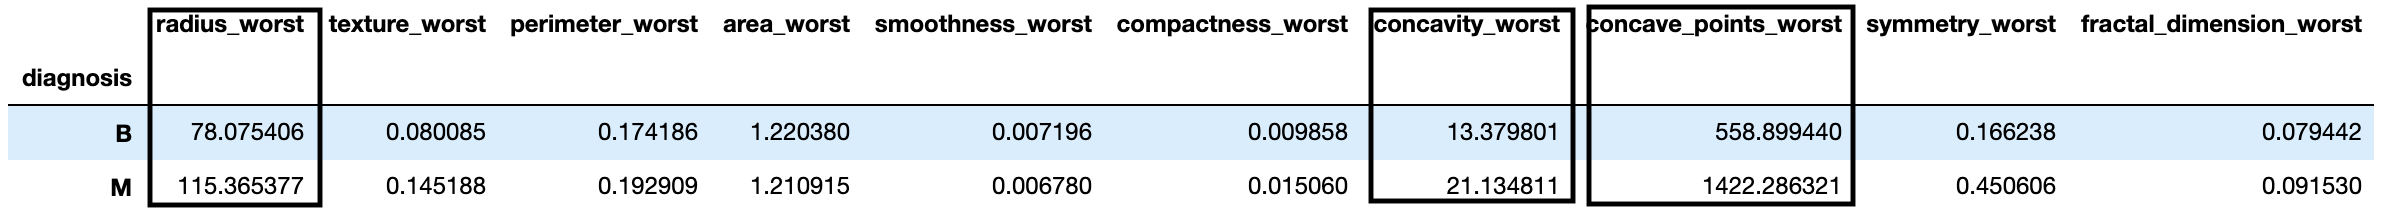

# Part 2

In [519]:
dataset = "https://gist.githubusercontent.com/jeff-boykin/9e1a450ef152604e6830ce70f4fc1be8/raw/4d42aebc2c2d3f7528a7769248720918e14f2e03/part-2-data.train.csv"

In [ ]:
student-sample-1.py

In [ ]:
Code :
    1. Overall a Good style of writing the code. Leaving the space in between each section
    2. Appreciate the comments gave above each section
    3. It would be great if the libraries are grouped in top
    4. Importing a library once is sufficient
    Following library is imported twice (from sklearn.cross_validation import cross_val_score) which can be avoided
    5. The LinearRegression model can be implement from linear_model package.
    So, instead of 
    from sklearn import LinearRegression USE from sklearn.linear_model import LinearRegression
    6. from sklearn.cross_validation is deprecated and made them available inside model_selection class
    So, instead of 
    from sklearn.cross_validation USE from sklearn.model_selection
    7. The data is loaded in a variable dataframe (d) but after that the dataFrame (d) is wrongly referenced as (data)
    which will throw error
    So, instead "d = pd.read_csv('../data/train.csv')" USE "data = pd.read_csv('../data/train.csv')"
    
Methodology:    
    1. Good way of loading a data
    2. It is unclear on what is target data and Independent Data. It would have been better to use 
    X for Independent data and y for Target data.
    3. It is recommended to use [] to access a column instead of .(dot) operator
    So, instead data.SalaryNormalized USE data["SalaryNormalized"]
    Because say if there is a column name(Salary Normalized) with space in between you can't use it with .(dot)
    data.Salary Normalized -----> Error
    data["Salary Normalized"] ----> Correct
    5. Make use of meaningful variables like
    Instead of d USE data_frame
    Instead of x1 USE salary_normalised_X
    Instead of x2 USE contract_type_y
    6. Cross_val_score is a k-fold crossvalidation technique so it is not used for its fullest with only one CV. 
    Better to have more CV say(>10) to know the benchmark of the model. If there is only one CV. mean.scores() is 
    equavent to the first CV score.
    
Conceptual Understanding:
    1. It is a good try being a learner.
    2. I appreciate writing the code. Don't fear to fail. Indeed we will learn from mistake.
    3. Some take way from me to be a great data scientist are
    4. Make use of good Integrated Developement Environment(IDE) like Jupyter notebook or Pycharm
    to get more auto suggestion help. So, that you don't want to remeber all the function and package


In [ ]:
student-sample-2.py

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

In [ ]:
Code :
    1. A neat attempt, really appreciate the time taken to write the snippet.
    2. Comments gave above each section adds readability of code
    3. Libraries are grouped in top very elegantly
    4. from sklearn.cross_validation is deprecated and made them available inside model_selection class
    So, instead of 
    from sklearn.cross_validation USE from sklearn.model_selection
    5. Good usage of variables
    
Methodology:    
    1. Good way of loading and evaluating.
    2. It is recommended to use [] to access a column instead of .(dot) operator
    So, instead data.SalaryNormalized USE data["SalaryNormalized"]
    Because say if there is a column name(Salary Normalized) with space in between you can't use it with .(dot)
    data.Salary Normalized -----> Error
    data["Salary Normalized"] ----> Correct

    
Conceptual Understanding:
    1. It is a great going being a learner writing this way of precise coding
    2. I am happy and sure that you have a good hold of programming and subject
    3. Some take way from me to be a great data scientist are 
    4. Go beyond the normal, I see potential in you. 
    5. Make use of hyper parameter, Learn about the right usage of tuning the parameter using GridsearchCV
    6. All the Best. Keep it up!
